In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
input_df = pd.read_csv('RESULTS_EUROVIS2015.csv')
cls = list(input_df.classNum)
input_df['index'] = [file.split('.')[0] + '_cls'+ str(cls[i]) for i, file in enumerate(list(input_df.fileName))]
input_df.head()

,fileName,indexFile,indexDR,classNum,scoreA,scoreM,scoreDes,DSC,CAL,HM,...,HDM 80,DC 2%,DUNN,DC 1%,DC 0.5%,CDM 1,DC 0.2%,DC 0.1%,AWTN,index
0,Entangled1-3d-3cl-separate_PCA_data.csv,1,1,1,5,4,1,83.946488,168.392790,85.211464,...,99.775785,93.433032,0.003952,98.920474,99.934515,88.151433,100.000000,100.0,330.792098,Entangled1-3d-3cl-separate_PCA_data_cls1
1,Entangled1-3d-3cl-separate_PCA_data.csv,1,1,2,5,4,1,81.438127,202.032855,83.724674,...,99.439462,92.019047,0.003344,98.654829,99.904137,81.307295,99.999407,100.0,327.474607,Entangled1-3d-3cl-separate_PCA_data_cls2
2,Entangled1-3d-3cl-separate_PCA_data.csv,1,1,3,5,4,1,83.612040,179.412919,85.662520,...,99.663677,93.679104,0.003371,99.009648,99.932368,88.336925,99.999407,100.0,327.621398,Entangled1-3d-3cl-separate_PCA_data_cls3
3,Entangled1-3d-3cl-separate_RobPCA_data.csv,1,2,1,5,4,1,83.919598,181.354553,84.760740,...,98.191443,93.611821,0.002583,99.128890,99.879285,82.383557,99.997036,100.0,324.705526,Entangled1-3d-3cl-separate_RobPCA_data_cls1
4,Entangled1-3d-3cl-separate_RobPCA_data.csv,1,2,2,5,4,1,81.407035,192.947084,83.722177,...,98.654709,92.693371,0.002513,99.029505,99.894526,85.241735,99.997332,100.0,324.363518,Entangled1-3d-3cl-separate_RobPCA_data_cls2


In [49]:
df1 = pd.read_csv('res_big_exp.csv', sep=',')
df2 = pd.read_csv('res_kncg_gong.csv', sep=',')
df1.head()

,Unnamed: 0,del_mcec,del_ltcc_0,del_ltcc_1,del_ce_True,del_mv_True,del_cp_True,del_ce_False,del_mv_False,del_cp_False,...,as_0.45_cp_False,as_0.5_mcec,as_0.5_ltcc_0,as_0.5_ltcc_1,as_0.5_ce_True,as_0.5_mv_True,as_0.5_cp_True,as_0.5_ce_False,as_0.5_mv_False,as_0.5_cp_False
0,Entangled1-3d-3cl-separate_PCA_data_cls1,1.0,0.989975,0.979899,0.006689,0.332776,0.993311,0.006689,0.332776,0.993311,...,0.381271,1.00,0.005013,0.010050,0.312709,0.332776,0.359532,0.312709,0.332776,0.359532
1,Entangled1-3d-3cl-separate_PCA_data_cls2,1.0,0.989975,0.909548,0.006689,0.332776,0.993311,0.006689,0.332776,0.993311,...,0.389632,1.00,0.005013,0.010050,0.319398,0.332776,0.362876,0.319398,0.332776,0.362876
2,Entangled1-3d-3cl-separate_PCA_data_cls3,1.0,0.957286,0.985000,0.005017,0.334448,0.994983,0.005017,0.334448,0.994983,...,0.379599,1.00,0.005025,0.010000,0.324415,0.334448,0.371237,0.324415,0.334448,0.371237
3,Entangled1-3d-3cl-separate_RobPCA_data_cls1,1.0,0.975000,0.974619,0.008375,0.329983,0.991625,0.008375,0.329983,0.991625,...,0.355109,0.98,0.005000,0.010152,0.309883,0.329983,0.350084,0.309883,0.329983,0.350084
4,Entangled1-3d-3cl-separate_RobPCA_data_cls2,1.0,0.972292,0.925000,0.006700,0.335008,0.991625,0.006700,0.335008,0.991625,...,0.378559,1.00,0.005038,0.010000,0.324958,0.335008,0.368509,0.324958,0.335008,0.368509


In [50]:
df1.columns = ['index' if x=='Unnamed: 0' else x for x in df1.columns]
df2.columns = ['index' if x=='Unnamed: 0' else x for x in df2.columns]

In [51]:
df = df1.merge(df2, on='index').merge(input_df[['index','scoreA','scoreM','DSC']], on='index')
df.to_csv('df.csv',index=False)

In [69]:
# scale and drop na
for col in df.columns:
    if col not in ['index','scoreA','scoreM']:
        df[col] = df[col]/df[col].max()

df.isnull().sum().sum()
df.dropna(axis=1, inplace=True)
df.head()

,index,del_mcec,del_ltcc_0,del_ltcc_1,del_ce_True,del_mv_True,del_cp_True,del_ce_False,del_mv_False,del_cp_False,...,gong_0.35_ltcc_1,gong_0.35_mv_True,gong_0.35_ce_True,gong_0.35_cp_True,gong_0.35_mv_False,gong_0.35_ce_False,gong_0.35_cp_False,scoreA,scoreM,DSC
0,Entangled1-3d-3cl-separate_PCA_data_cls1,1.0,0.989975,0.979899,0.072971,0.362450,0.993311,0.072971,0.362450,0.993311,...,0.437186,0.362450,0.178485,0.968227,0.362450,0.178485,0.968227,5,4,0.839465
1,Entangled1-3d-3cl-separate_PCA_data_cls2,1.0,0.989975,0.909548,0.072971,0.362450,0.993311,0.072971,0.362450,0.993311,...,0.452261,0.362450,0.209983,0.969900,0.362450,0.209983,0.969900,5,4,0.814381
2,Entangled1-3d-3cl-separate_PCA_data_cls3,1.0,0.957286,0.985000,0.054728,0.364272,0.994983,0.054728,0.364272,0.994983,...,0.415000,0.364272,0.167986,0.973244,0.364272,0.167986,0.973244,5,4,0.836120
3,Entangled1-3d-3cl-separate_RobPCA_data_cls1,1.0,0.975000,0.974619,0.091366,0.359409,0.991625,0.091366,0.359409,0.991625,...,0.436548,0.359409,0.157751,0.961474,0.359409,0.157751,0.961474,5,4,0.839196
4,Entangled1-3d-3cl-separate_RobPCA_data_cls2,1.0,0.972292,0.925000,0.073093,0.364882,0.991625,0.073093,0.364882,0.991625,...,0.440000,0.364882,0.252401,0.968174,0.364882,0.252401,0.968174,5,4,0.814070


In [66]:
gtypes = set([cc.split('_')[0] for cc in df.columns])
gtypes = [ 'scoreA','scoreM','DSC','rng','kncg','knn','as','bt','del','gong','mst']

scoreA
scoreM
DSC
rng
kncg
knn
as
bt
del
gong
mst


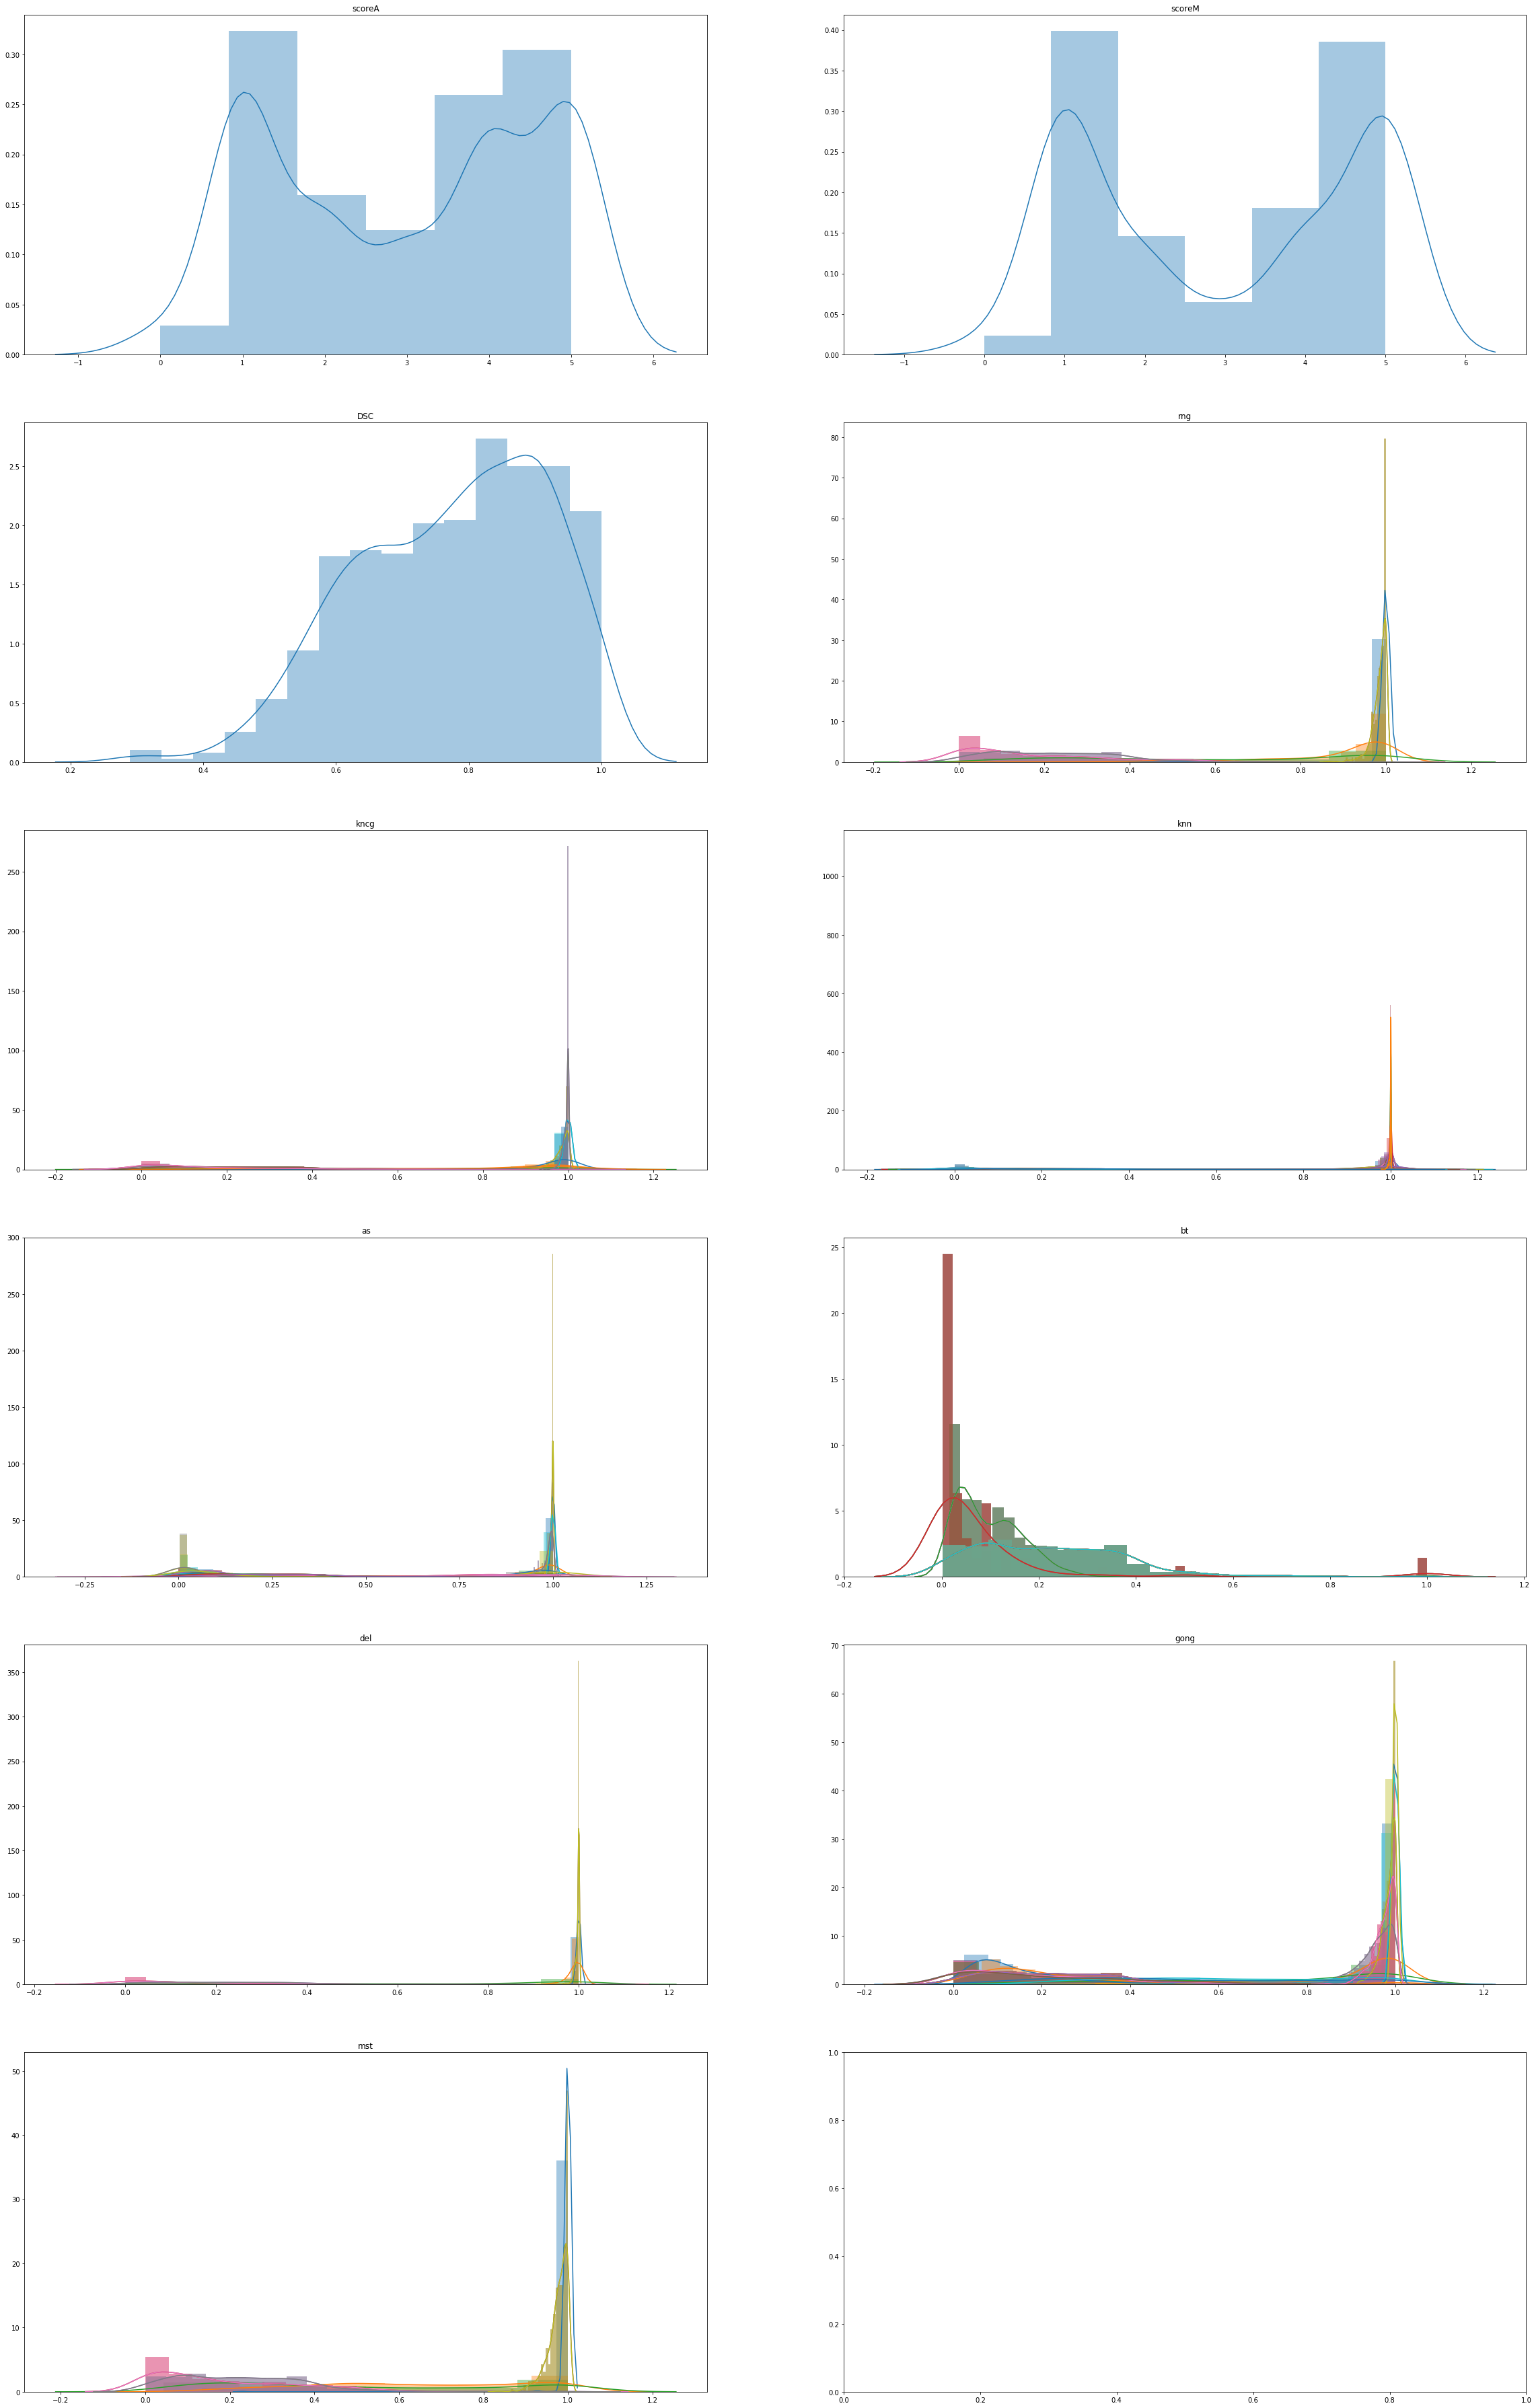

In [68]:
ii = 6
jj = 2

f, axes = plt.subplots(ii,jj, figsize=(40, 65))
for i, gg in enumerate(gtypes):
    print(gg)
    for cc in df.columns:
        if cc == 'index':
            continue
        if cc.startswith(gg):
            sns.distplot(list(df[cc]), ax=axes[i//jj, i%jj]).set_title(gg)

In [30]:
pd.Series([cc.split('_')[0] for cc in df.columns]).value_counts()

knn       135
bt         54
as         54
gong       27
kncg       27
mst         9
del         9
rng         9
DSC         1
scoreA      1
index       1
scoreM      1
dtype: int64

In [70]:
df

,index,del_mcec,del_ltcc_0,del_ltcc_1,del_ce_True,del_mv_True,del_cp_True,del_ce_False,del_mv_False,del_cp_False,...,gong_0.35_ltcc_1,gong_0.35_mv_True,gong_0.35_ce_True,gong_0.35_cp_True,gong_0.35_mv_False,gong_0.35_ce_False,gong_0.35_cp_False,scoreA,scoreM,DSC
0,Entangled1-3d-3cl-separate_PCA_data_cls1,1.0,0.989975,0.979899,0.072971,0.362450,0.993311,0.072971,0.362450,0.993311,...,0.437186,0.362450,0.178485,0.968227,0.362450,0.178485,0.968227,5,4,0.839465
1,Entangled1-3d-3cl-separate_PCA_data_cls2,1.0,0.989975,0.909548,0.072971,0.362450,0.993311,0.072971,0.362450,0.993311,...,0.452261,0.362450,0.209983,0.969900,0.362450,0.209983,0.969900,5,4,0.814381
2,Entangled1-3d-3cl-separate_PCA_data_cls3,1.0,0.957286,0.985000,0.054728,0.364272,0.994983,0.054728,0.364272,0.994983,...,0.415000,0.364272,0.167986,0.973244,0.364272,0.167986,0.973244,5,4,0.836120
3,Entangled1-3d-3cl-separate_RobPCA_data_cls1,1.0,0.975000,0.974619,0.091366,0.359409,0.991625,0.091366,0.359409,0.991625,...,0.436548,0.359409,0.157751,0.961474,0.359409,0.157751,0.961474,5,4,0.839196
4,Entangled1-3d-3cl-separate_RobPCA_data_cls2,1.0,0.972292,0.925000,0.073093,0.364882,0.991625,0.073093,0.364882,0.991625,...,0.440000,0.364882,0.252401,0.968174,0.364882,0.252401,0.968174,5,4,0.814070
5,Entangled1-3d-3cl-separate_RobPCA_data_cls3,1.0,0.982368,0.960000,0.036546,0.364882,0.998325,0.036546,0.364882,0.998325,...,0.660000,0.364882,0.147234,0.981575,0.364882,0.147234,0.981575,5,4,0.844221
6,Entangled1-3d-3cl-separate_GlimmerMDS_cls1,1.0,0.997500,1.000000,0.000000,0.363057,0.998333,0.000000,0.363057,0.998333,...,0.800000,0.363057,0.031392,0.996667,0.363057,0.031392,0.996667,5,5,0.873333
7,Entangled1-3d-3cl-separate_GlimmerMDS_cls2,1.0,1.000000,0.995000,0.018182,0.363057,1.000000,0.018182,0.363057,1.000000,...,0.940000,0.363057,0.020928,0.998333,0.363057,0.020928,0.998333,5,5,0.861667
8,Entangled1-3d-3cl-separate_GlimmerMDS_cls3,1.0,0.997500,0.995000,0.018182,0.363057,0.998333,0.018182,0.363057,0.998333,...,0.995000,0.363057,0.010464,0.995000,0.363057,0.010464,0.995000,5,5,0.880000
9,Entangled1-3d-3cl-separate_TSNE_cls1,1.0,1.000000,1.000000,0.000000,0.362450,1.000000,0.000000,0.362450,1.000000,...,0.567839,0.362450,0.000000,1.000000,0.362450,0.000000,1.000000,5,5,0.856187


In [ ]:
for cc in df.columns:
    